# Neural Computing Coursework 
Daria Rozhnova

### Plan:

#### For Code:
1. Syntactic correctness 5%
2. Organization and clarity of comments 10%
3. Appropriate use and sophistication of methods 10%

#### For Paper:
1. Brief description and motivation of the problem 5%
2. Description of the dataset including data types (discrete, continuous, etc.) 10%
3. Brief summary of the two neural network models with their pros and cons 10%
4. Hypothesis statement 5%
5. Description of choice of training and evaluation methodology 5%
6. Choice of parameters and experimental results 5%
7. Analysis and critical evaluation of results 20%
8. Conclusions, lessons learned, references and future work 5%

#### For Appendix:
1. Glossary 5%
2. Implementation details 5% 

To do in code:
1. Data statement, cleaning, shuffling
2. Train, Validation, Test separation 
3. Standardising training data
4. Base Model statement
5. Grid Search 
6. Model Selection 
7. Acuuracies for traiing, validation, testing
8. Confusion matrices
9. Evaluation metrics

Note: all links provided in this file are done as a form of reference

# Import libraries

In [1]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import seaborn as sns
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

# Import dataset

In [3]:
wine = pd.read_csv('winequality-white.csv',sep=';')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# Preliminary data cleaning
Only white wines will be used for analysis in this project. This leads to 4898 rows and 12 columns, where 11 of them are predictive features and 1 target (quality).

### Missing values

In [4]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing data points, therefore there no need to remove or interpolate any rows.

### Feature description and encoding

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


We observe that all descriptive features of wine dataset are continious and displayed above

In [6]:
pd.unique(wine['quality'])

array([6, 5, 7, 8, 4, 3, 9])

This shows that there only 7 distinct values for quality of wine.This turns regression problem into a classifciation problem. We can assign new categories based on these values. However, before we would like to see the distribution of these values.

<AxesSubplot:>

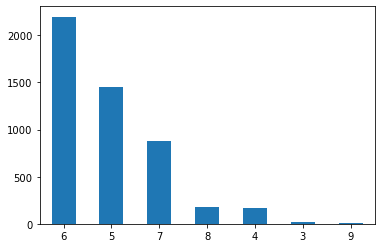

In [7]:
wine['quality'].value_counts().plot.bar(rot=0)

We are dealing with unbalanced data, fi we assume that these rankings are categories. We can assign new categories in such way that: poor quality - '3,4', average quality - '5,6', good quality - '7,8,9'. We will represent these categories wiht numerical values : 0 - poor, 1 - average, 2 - good.

In [8]:
new_wine=wine.replace(to_replace=(3,4,5,6,7,8,9), value=(0,0,1,1,2,2,2),inplace=False)

In [9]:
new_wine['quality'].value_counts()

1    3655
2    1060
0     183
Name: quality, dtype: int64

([<matplotlib.patches.Wedge at 0x7f898116e100>,
 [Text(-0.7685334293551789, 0.7869919745229735, '1'),
  Text(0.6710828114221995, -0.8715777992891265, '2'),
  Text(1.0924312008395007, -0.1288179779082348, '0')],
 [Text(-0.4192000523755521, 0.4292683497398037, '74.6%'),
  Text(0.3660451698666542, -0.4754060723395235, '21.6%'),
  Text(0.5958715640942731, -0.07026435158630988, '3.7%')])

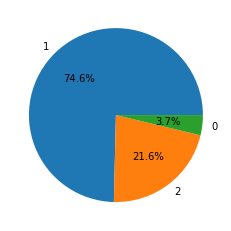

In [10]:
#Pie chart for new target values
labels = '1', '2', '0'
sizes = [3655, 1060, 183]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

Boxplots for exploration of each variable

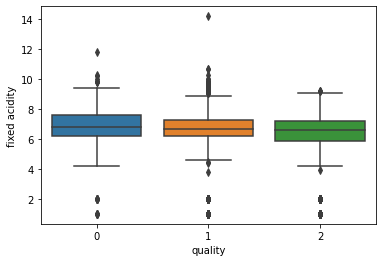

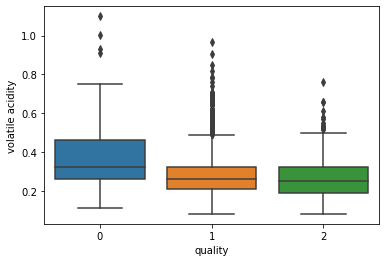

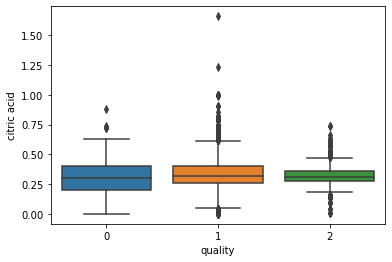

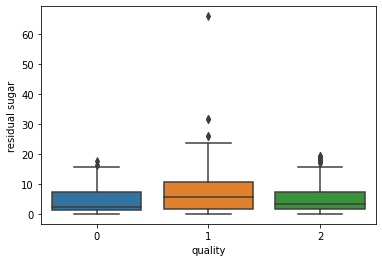

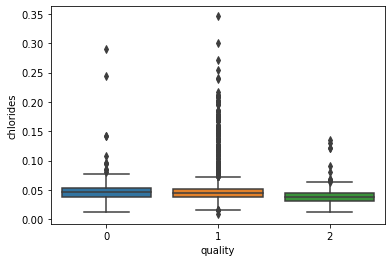

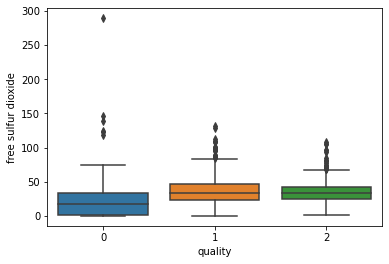

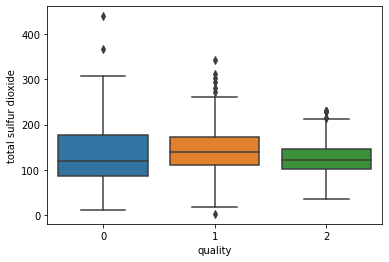

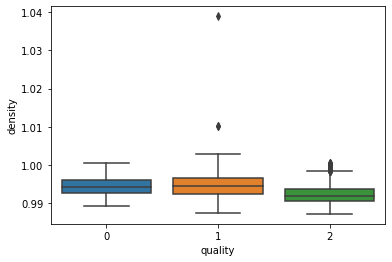

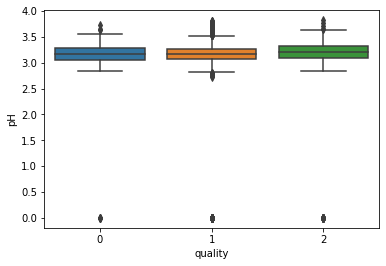

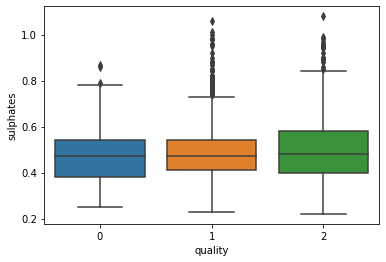

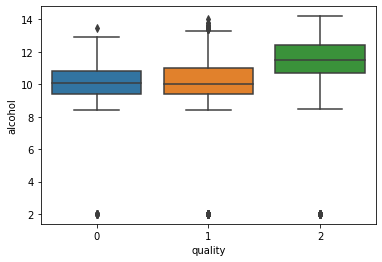

In [11]:
columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
         'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
for column in columns:
    sns.boxplot(x = new_wine['quality'],
                y = new_wine[column])
    plt.show()

Correlation heatmap

In [14]:
wine_corr=new_wine.corr()
wine_corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.003078,0.158716,0.059619,0.001137,0.002640,0.068406,0.154708,-0.097385,0.021964,-0.053870,-0.066651
volatile acidity,-0.003078,1.000000,-0.149472,0.058733,0.070512,-0.100426,0.089120,0.027114,-0.019653,-0.035728,0.034266,-0.135744
citric acid,0.158716,-0.149472,1.000000,0.094491,0.114364,0.093513,0.121186,0.149503,-0.080796,0.062331,-0.041007,-0.013530
residual sugar,0.059619,0.058733,0.094491,1.000000,0.092308,0.295483,0.394041,0.829715,-0.110391,-0.025797,-0.405033,-0.082302
chlorides,0.001137,0.070512,0.114364,0.092308,1.000000,0.100611,0.198929,0.257211,-0.036310,0.016763,-0.277129,-0.177527
free sulfur dioxide,0.002640,-0.100426,0.093513,0.295483,0.100611,1.000000,0.615342,0.291754,0.015241,0.060507,-0.187945,0.028339
total sulfur dioxide,0.068406,0.089120,0.121186,0.394041,0.198929,0.615342,1.000000,0.529902,-0.008794,0.134592,-0.355279,-0.126650
density,0.154708,0.027114,0.149503,0.829715,0.257211,0.291754,0.529902,1.000000,-0.052809,0.074493,-0.617709,-0.256636
pH,-0.097385,-0.019653,-0.080796,-0.110391,-0.036310,0.015241,-0.008794,-0.052809,1.000000,0.050930,0.078031,0.025087
sulphates,0.021964,-0.035728,0.062331,-0.025797,0.016763,0.060507,0.134592,0.074493,0.050930,1.000000,0.017961,0.051121


As we have seen in a pie chart, the data is imbalanced. Due to the nature of the algorithm used in this project, we are required to perform balancing algorithm. Here we will use SMOTE with Tomek to undersample the majority class and oversample the minority class.

Firstly, we separate into X and y, where X is a design matrix of all descriptive features and y is a target value (quality)

In [15]:
X, y = new_wine.values[:, :-1], new_wine.values[:, -1]

In [16]:
y = LabelEncoder().fit_transform(y)
oversample = SMOTETomek(random_state=42)

X_smote, y_smote = oversample.fit_resample(X, y)


https://towardsdatascience.com/stop-using-smote-to-handle-all-your-imbalanced-data-34403399d3be

Now, we put data back into orginal dataframe form and give the original variable names

In [17]:
wine_y = pd.DataFrame(y_smote)
wine_X = pd.DataFrame(X_smote)

In [18]:
wine_X.rename(columns= {0: "fixed acidity",
              1: "volatile acidity",
              2: "citric acid",
              3: "residual sugar",
              4: "chlorides",
              5: "free sulfur dioxide",
              6: "total sulfur dioxide",
              7: "density",
              8: "pH",
              9: "sulphates",
              10: "alcohol"},inplace=True)
wine_balanced=wine_X
wine_balanced["quality"]=wine_y
#New class amounts
wine_balanced['quality'].value_counts()

0    3619
2    3591
1    3563
Name: quality, dtype: int64

Splitting data into train and test sets (80/20)

In [19]:
X = wine_balanced.iloc[:, 0:-1]
y = wine_balanced.iloc[:, -1]
X=X.astype('float32')
y=y.astype('int64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

Standardising the X training anf testing sets. This is neccesary as MLP, one of the algorithms used in this project, is very sensitive to scaled features.

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# SVM

We start by set up of a single model to oberve how well SVM performs with some non default settings

In [19]:
# Baseline model setup:
SVM = SVC(kernel='linear', gamma='scale')
SVM.fit(X_train, y_train)
#Predicting the Test Set
y_pred = SVM.predict(X_test)

In [20]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[489 157  63]
 [185 334 209]
 [ 51 156 511]]


In [ ]:
accuracies = cross_val_score(estimator = SVM, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

As seen from cofusion matrix and validation accuracy, this model is not good enough for prediction of wine quality, therefore we will use GridSearch algorithm with  some different hyperpaameters to search for the optimal model with improved performance. 

https://scikit-learn.org/stable/modules/grid_search.html

In [21]:
start= time.time()
parameters = [
    {'C': [0.1,1,10], 'kernel': ['linear']},
    {'C': [0.1,1,10],"gamma": [0.1,0.01,0.001], 'kernel': ['poly'],'degree': [2,3,4,5]},
    {'C': [0.1,1,10],"gamma": [0.1,0.01,0.001], 'kernel': ['rbf']},
]
grid_search = GridSearchCV(estimator = SVC(),
                           param_grid = parameters,
                           cv = 5,verbose=3,return_train_score=True)
grid_search.fit(X_train, y_train) 
print(grid_search.best_score_)
print(grid_search.best_params_)
stop = time.time()
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END C=0.1, kernel=linear;, score=(train=0.654, test=0.640) total time=   1.9s
[CV 2/5] END C=0.1, kernel=linear;, score=(train=0.650, test=0.646) total time=   1.7s
[CV 3/5] END C=0.1, kernel=linear;, score=(train=0.648, test=0.662) total time=   1.8s
[CV 4/5] END C=0.1, kernel=linear;, score=(train=0.656, test=0.636) total time=   1.9s
[CV 5/5] END C=0.1, kernel=linear;, score=(train=0.650, test=0.654) total time=   2.1s
[CV 1/5] END C=1, kernel=linear;, score=(train=0.652, test=0.636) total time=   3.3s
[CV 2/5] END C=1, kernel=linear;, score=(train=0.650, test=0.647) total time=   4.5s
[CV 3/5] END C=1, kernel=linear;, score=(train=0.647, test=0.660) total time=   3.8s
[CV 4/5] END C=1, kernel=linear;, score=(train=0.653, test=0.635) total time=   2.7s
[CV 5/5] END C=1, kernel=linear;, score=(train=0.648, test=0.652) total time=   3.9s
[CV 1/5] END C=10, kernel=linear;, score=(train=0.652, test=0.636) total time=

Effect of gamma and other on SVM performance:
https://www.academia.edu/43777322/The_effect_of_gamma_value_on_support_vector_machine_performance_with_different_kernels

After Grid Search with 5 fold cross validation was performed, the best model was produced when Kernel was RBF with C=10 and gamma=0.1. It was chosen based on highest validation score. The model seems correct with reference to the theory about SVMs. And therefore this model was chosen as the model for final algorithm comparison. The output of grid search with cross validation can be seen in the table below.

In [56]:
#For the table
svm_trained = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"],columns= ['Validation Score']), pd.DataFrame(grid_search.cv_results_["mean_train_score"],columns =["Train Score"])],axis=1)
#svm_trained.to_excel('svm.xlsx')
svm_trained

,C,kernel,degree,gamma,Validation Score,Train Score
0,0.1,linear,NaN,NaN,0.647597,0.651630
1,1.0,linear,NaN,NaN,0.645857,0.650180
2,10.0,linear,NaN,NaN,0.645973,0.650499
3,0.1,poly,2.0,0.100,0.648408,0.658940
4,0.1,poly,2.0,0.010,0.430610,0.431655
5,0.1,poly,2.0,0.001,0.337665,0.337665
6,0.1,poly,3.0,0.100,0.690995,0.703933
7,0.1,poly,3.0,0.010,0.337781,0.337781
8,0.1,poly,3.0,0.001,0.337665,0.337665
9,0.1,poly,4.0,0.100,0.596193,0.611540


In [32]:
# Optimal model with highest validation score:
SVM = SVC(kernel='rbf', C=10, gamma=0.1)
SVM.fit(X_train, y_train)
#Predicting the Test Set
y_pred = SVM.predict(X_test)

Confusion matrix for the optimal model SVM

<AxesSubplot:>

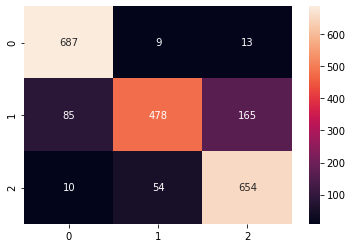

In [33]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

Training, Validation, Testing Acurracies, Time and Evaluation metrics were presented below for the best performed model of SVM

In [34]:
validation_accuracy = cross_val_score(estimator = SVM, X = X_train, y = y_train, cv = 5)
training_accuracy=SVM.score(X_train, y_train)
print("Validation Accuracy: {:.2f} %".format(validation_accuracy.mean()*100))
print("Standard Deviation: {:.2f} %".format(validation_accuracy.std()*100))
print("Training Accuracy: {:.2f} %".format(training_accuracy*100))
start = time.time()
SVM = SVC(kernel='rbf', C=10, gamma=0.1)
SVM.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
print(classification_report(y_test, y_pred))

Validation Accuracy: 84.51 %
Standard Deviation: 0.79 %
Training Accuracy: 88.96 %
Training time: 2.349858045578003s
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       709
           1       0.88      0.66      0.75       728
           2       0.79      0.91      0.84       718

    accuracy                           0.84      2155
   macro avg       0.85      0.85      0.84      2155
weighted avg       0.85      0.84      0.84      2155



# MLP Sklearn

Similar to SVM set up steps, we begin with set up of a baseline model with some non default settings.

In [116]:
MLP=MLPClassifier(hidden_layer_sizes=(5,5), activation='relu',
                                     solver='sgd', alpha=0.0001, batch_size='auto', learning_rate='constant', 
                                     learning_rate_init=0.01,max_iter=300)

https://www.heatonresearch.com/2017/06/01/hidden-layers.html?ref=hackernoon.com

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [117]:
MLP.fit(X_train, y_train)
#Predicting the Test Set
y_pred = MLP.predict(X_test)

In [118]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[499 182  28]
 [124 388 216]
 [ 19 100 599]]


In [119]:
accuracies = cross_val_score(estimator = MLP, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 71.06 %
Standard Deviation: 2.03 %


Performnig Grid Search for MLP to obtain the best performed model in terms of validation score

In [35]:
start=time.time()
parameters = {
        'hidden_layer_sizes': [ (10,),(20,),(10,10),(20,20),(10,10,10),(20,20,20)],
        'learning_rate_init' : [0.1,0.01,0.001],
        'momentum': [0.5,0.7,0.9],
        }
mlp_search = GridSearchCV(estimator = MLPClassifier(solver='sgd',learning_rate='constant',early_stopping = True),
                           param_grid = parameters,
                           cv = 5,verbose=3,return_train_score=True)
mlp_search.fit(X_train, y_train) 
print(mlp_search.best_score_)
print(mlp_search.best_params_)
stop = time.time()
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END hidden_layer_sizes=(10,), learning_rate_init=0.1, momentum=0.5;, score=(train=0.709, test=0.708) total time=   0.4s
[CV 2/5] END hidden_layer_sizes=(10,), learning_rate_init=0.1, momentum=0.5;, score=(train=0.732, test=0.725) total time=   0.8s
[CV 3/5] END hidden_layer_sizes=(10,), learning_rate_init=0.1, momentum=0.5;, score=(train=0.740, test=0.731) total time=   0.7s
[CV 4/5] END hidden_layer_sizes=(10,), learning_rate_init=0.1, momentum=0.5;, score=(train=0.721, test=0.677) total time=   0.4s
[CV 5/5] END hidden_layer_sizes=(10,), learning_rate_init=0.1, momentum=0.5;, score=(train=0.714, test=0.727) total time=   0.4s
[CV 1/5] END hidden_layer_sizes=(10,), learning_rate_init=0.1, momentum=0.7;, score=(train=0.737, test=0.729) total time=   0.5s
[CV 2/5] END hidden_layer_sizes=(10,), learning_rate_init=0.1, momentum=0.7;, score=(train=0.727, test=0.725) total time=   0.7s
[CV 3/5] END hidden_layer_sizes=(10

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END hidden_layer_sizes=(10, 10), learning_rate_init=0.001, momentum=0.5;, score=(train=0.634, test=0.654) total time=   5.6s
[CV 4/5] END hidden_layer_sizes=(10, 10), learning_rate_init=0.001, momentum=0.5;, score=(train=0.627, test=0.616) total time=   2.1s
[CV 5/5] END hidden_layer_sizes=(10, 10), learning_rate_init=0.001, momentum=0.5;, score=(train=0.402, test=0.396) total time=   0.3s
[CV 1/5] END hidden_layer_sizes=(10, 10), learning_rate_init=0.001, momentum=0.7;, score=(train=0.623, test=0.619) total time=   1.4s
[CV 2/5] END hidden_layer_sizes=(10, 10), learning_rate_init=0.001, momentum=0.7;, score=(train=0.654, test=0.658) total time=   3.1s
[CV 3/5] END hidden_layer_sizes=(10, 10), learning_rate_init=0.001, momentum=0.7;, score=(train=0.653, test=0.672) total time=   2.0s
[CV 4/5] END hidden_layer_sizes=(10, 10), learning_rate_init=0.001, momentum=0.7;, score=(train=0.644, test=0.621) total time=   1.8s
[CV 5/5] END hidden_layer_sizes=(10, 10), learning_rate_init=0

In [53]:
#For the table
mlp_trained= pd.concat([pd.DataFrame(mlp_search.cv_results_["params"]),pd.DataFrame(mlp_search.cv_results_["mean_test_score"],columns= ['Validation Score']), pd.DataFrame(mlp_search.cv_results_["mean_train_score"],columns =["Train Score"])],axis=1)
#mlp_trained.to_excel('mlp.xlsx')
mlp_trained

,hidden_layer_sizes,learning_rate_init,momentum,Validation Score,Train Score
0,"(10,)",0.100,0.5,0.713736,0.723138
1,"(10,)",0.100,0.7,0.716753,0.728678
2,"(10,)",0.100,0.9,0.719539,0.730738
3,"(10,)",0.010,0.5,0.672542,0.681540
4,"(10,)",0.010,0.7,0.685773,0.694245
5,"(10,)",0.010,0.9,0.699582,0.707154
6,"(10,)",0.001,0.5,0.620102,0.618095
7,"(10,)",0.001,0.7,0.645508,0.645480
8,"(10,)",0.001,0.9,0.663380,0.668397
9,"(20,)",0.100,0.5,0.727317,0.741238


Grid Search with 5 fold cross validation gave us the result of best perfomring model. THIs model is obtained when hidden layer size was 2 layers with 20 neurons each, momentum = 0.9 and learning rate = 0.1. 

In [36]:
mlp=MLPClassifier(hidden_layer_sizes=(20,20),solver='sgd',learning_rate='constant',early_stopping = True,
                   learning_rate_init=0.1, momentum=0.9, tol=1e-06)
mlp.fit(X_train, y_train)
#Predicting the Test Set
y_pred = mlp.predict(X_test)

In [37]:
mlp.score(X_train, y_train)

0.843351125551172

In [38]:
accuracies = cross_val_score(estimator = mlp, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 77.44 %
Standard Deviation: 2.12 %


Notice this accuracy is differnet from the one obtained during Grid Search. This is due to the fact that initialisation start with different weights. 

Confusion matrix for MLP

<AxesSubplot:>

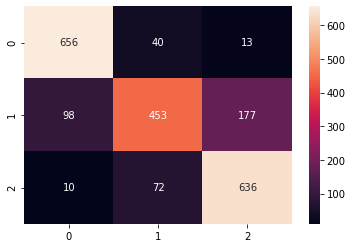

In [39]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

Training, Validation, Testing Acurracies, Time and Evaluation metrics were presented below for the best performed model of MLP

In [40]:
validation_accuracy = cross_val_score(estimator = mlp, X = X_train, y = y_train, cv = 5)
training_accuracy=mlp.score(X_train, y_train)
print("Validation Accuracy: {:.2f} %".format(validation_accuracy.mean()*100))
print("Standard Deviation: {:.2f} %".format(validation_accuracy.std()*100))
print("Training Accuracy: {:.2f} %".format(training_accuracy*100))
start = time.time()
try1=MLPClassifier(hidden_layer_sizes=(20,20,20),solver='sgd',learning_rate='constant',early_stopping = True,
                   learning_rate_init=0.01, momentum=0.9, tol=1e-06)
try1.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
print(classification_report(y_test, y_pred))

Validation Accuracy: 78.53 %
Standard Deviation: 0.47 %
Training Accuracy: 84.34 %
Training time: 1.9295082092285156s
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       709
           1       0.80      0.62      0.70       728
           2       0.77      0.89      0.82       718

    accuracy                           0.81      2155
   macro avg       0.81      0.81      0.81      2155
weighted avg       0.81      0.81      0.80      2155

